## Artist Performance Analysis ##

## Part 1: Cleaning the data
---------

The first part of our project is cleaning the "Popular_Spotify_Songs.csv" file for analysis and visualization purposses through the code


In [1]:
#Importing dependecies/libraries for analysis and maniplation purposes

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
# Defining the file path to find the data from "Popular_Spotify_Songs.csv" file
spotify_file = Path('Resources/Popular_Spotify_Songs.csv')

# Reading "Popular_Spotify_Songs.csv" file to pull in data to create a dataframe
top_streaming_platform_songs= pd.read_csv(spotify_file)

#Displaying all the data
top_streaming_platform_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
## Dropping the entire row of any "track_name" that has a specical character

is_readable = lambda x: all(ord(c) < 128 for c in str(x))

# Filter the DataFrame to drop rows with unreadable characters
cleaned_top_songs = top_streaming_platform_songs[top_streaming_platform_songs.map(is_readable).all(axis=1)]

cleaned_top_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
cleaned_top_spotify_songs.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
# Overriding "cleaned_top_spotify_songs" dataframe with only columns that will be used for analysis and visualization 

cleaned_top_songs = cleaned_top_songs[['artist(s)_name', 'track_name', 'artist_count', 'released_year', 'released_month', 'released_day' , 'in_spotify_playlists', 'in_spotify_charts',     ##Maybe add .loc if really necessary
                                                      'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]

#Displaying cleaned dataframe with
cleaned_top_songs

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0
951,"Feid, Sech, Jhayco",En La De Ella,3,2022,10,20,1320,0,133895612,29,26,17,0,0


In [ ]:
# MAYBE: Overriding "cleaned_top_spotify_songs" dataframe with new column names that are more intuitive  

----------
## Top Months to Release Songs
----------

In [43]:
month_most_released_songs_df

,count
released_month,
1,119
2,54
3,73
4,58
5,111
6,78
7,57
8,38
9,50


In [6]:
import calendar

# Finding the months that have the most released song throughout years 1930 to 2023
month_most_released_songs_series = cleaned_top_songs['released_month'].value_counts()

month_num_list=[1,2,3,4,5,6,7,8,9,10,11,12]

#Empty List to append the names of each month instead of a numerical value for each month (Ex: 1=> Janurary)
month_name_list=[]

# Creating a dataframe from series "month_most_released_songs_series"
month_most_released_songs_df = pd.DataFrame(month_most_released_songs_series).sort_values('released_month')

# For loop to find each month in the 'month_num' list above
for month_num in month_num_list:

  # Appending the changed month name into the new list called "month_name"
  month_name_list.append(calendar.month_name[month_num])


# Creating a new dataframe "new_months" with month name and song count
new_months_df = pd.DataFrame({'Months':month_name_list, 'Song Count':month_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Months" as names instead of numbers and "Song Count" of each months for number of songs released in those months
new_months_df = new_months_df.reset_index(drop=True)  # Drop the old index if desired

#Displaying 'new_months' dataframe
new_months_df



,Months,Song Count
0,January,119
1,February,54
2,March,73
3,April,58
4,May,111
5,June,78
6,July,57
7,August,38
8,September,50
9,October,64


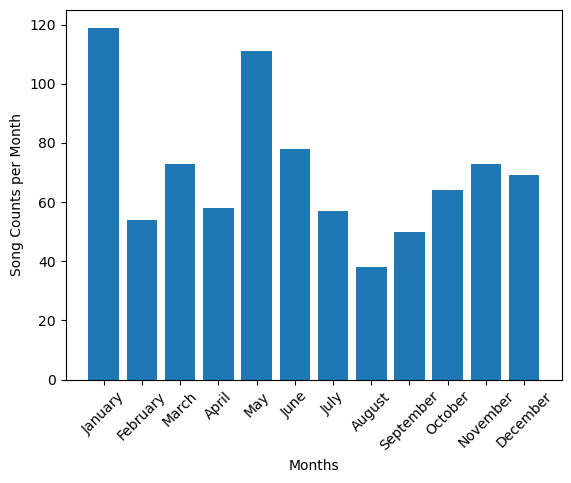

In [7]:
# Creating visualization for "Months" vs "Song Count per Month"

#Defining x & y-axes for bar chart
x_axis = new_months_df['Months']
y_axis = new_months_df['Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

# Making x-axis labels more visually appealing 
plt.xticks(rotation = 45)

#Defining x & y-axes labels for bar chart
plt.xlabel('Months')
plt.ylabel('Song Counts per Month')

#Diplay Bar Graph
plt.show()


## Months vs Song Count Analysis 
* Seems like the artists tend to release songs going into each new season - (Fall, Winter, Spring, Summer)

----------
## Performance of Collaborating vs Solo Artists
----------

In [38]:
cleaned_top_songs.head()

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425


In [45]:
# Dataframe of songs that were created just by an individual artist
solo_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] <= 1]
#solo_artists_df

# Dataframe of songs that were created as collobrations from 2 or more artists
collab_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] > 1]
collab_artists_df

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826
5,"Dave, Central Cee",Sprinter,2,2023,6,1,2186,91,183706234,67,213,88,17,946
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,2,2023,3,16,3090,50,725980112,34,222,43,13,418
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,2,2023,3,17,2953,44,553634067,49,110,66,13,339
10,"Bad Bunny, Grupo Frontera",un x100to,2,2023,4,17,2876,40,505671438,41,205,54,12,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,"Ludwig Goransson, Foudeqush",Con La Brisa,2,2022,11,4,486,0,71095708,8,1,7,0,0
943,"Drake, 21 Savage",Privileged Rappers,2,2022,11,4,1007,0,112436403,6,5,3,0,0
946,"Drake, 21 Savage",Broke Boys,2,2022,11,4,1060,0,106249219,3,8,5,0,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0
